<a href="https://colab.research.google.com/github/meens174/AI-and-ML-projects/blob/main/Loading_Loan_Prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys

In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
%cd content/MyDrive/Colab ""Notebooks/Fundamentals ""of ""Deep ""Learning

/content/content/MyDrive/Colab Notebooks/Fundamentals of Deep Learning


In [ ]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('loan_prediction_data.csv')

In [ ]:
data.shape

(614, 13)

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
X=data.drop('Loan_Status', axis=1)
y=data['Loan_Status']
X.shape, y.shape

((614, 12), (614,))

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X.drop(columns='Loan_ID'),y, stratify=data['Loan_Status'], random_state=10, test_size=0.2)

In [ ]:
(X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape)

((491, 11), (491,), (123, 11), (123,))

In [ ]:
import keras
print(keras.__version__)

3.5.0


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.17.1


In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [ ]:
X_train.shape[1]

11

In [ ]:
X_test.shape

(123, 11)

In [ ]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
164,LP001572,0.0,1.0,0.000000,1.0,0.0,0.113457,0.000000,0.095514,0.358974,1.0,1.0
171,LP001585,0.0,1.0,1.000000,1.0,0.0,0.638380,0.000000,1.000000,0.615385,1.0,1.0
546,LP002768,0.0,0.0,0.000000,0.0,0.0,0.039678,0.000000,0.102750,0.051282,1.0,0.5
226,LP001754,0.0,1.0,0.000000,0.0,1.0,0.056710,0.000000,0.186686,0.743590,1.0,1.0
176,LP001608,0.0,1.0,0.666667,1.0,0.0,0.023438,0.038856,0.133140,0.743590,1.0,0.0


In [ ]:
input_neurons=X_train.shape[1]

In [ ]:

# As the above is a binary classification problem
output_neuron=1

# Fix the hidden layers
number_of_hidden_layers=2
neuron_hidden_layer_1=10
neuron_hidden_layer_2=5

In [ ]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units=output_neuron,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
input_neurons*neuron_hidden_layer_1 +10
# As the hiffen layer 1 has 10 neurons, we have 10 boas components


120

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model_history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3596 - loss: 0.8031 - val_accuracy: 0.3333 - val_loss: 0.7817
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3501 - loss: 0.7493 - val_accuracy: 0.4065 - val_loss: 0.7313
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4824 - loss: 0.7111 - val_accuracy: 0.6098 - val_loss: 0.6816
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6272 - loss: 0.6692 - val_accuracy: 0.6504 - val_loss: 0.6456
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6947 - loss: 0.6229 - val_accuracy: 0.7073 - val_loss: 0.6192
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7251 - loss: 0.5942 - val_accuracy: 0.7073 - val_loss: 0.6070
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6500 - loss: 0.6270 - val_accuracy: 0.6992 - val_loss: 0.6014
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6902 - loss: 0.6013 - val_accuracy: 0.6992 - val_loss

In [ ]:
prediction=model.predict(X_test)
y_pred= (model.predict(X_test) > 0.5).astype("int32")
# y_pred=np.argmax(prediction,axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
accuracy_score(y_test, y_pred)

0.8130081300813008

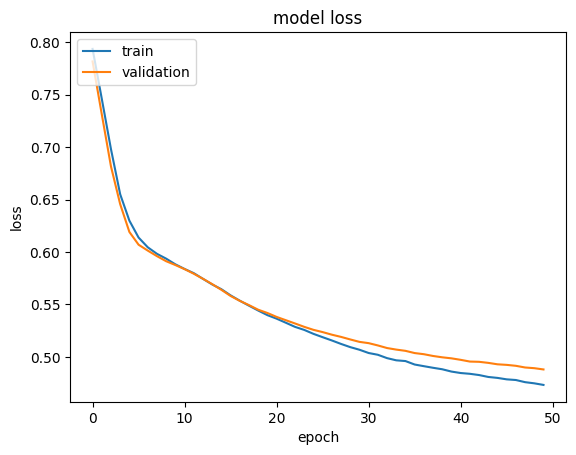

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

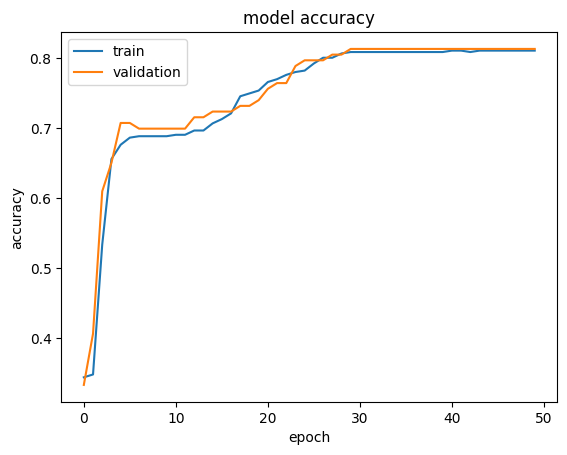

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

Implementation of the Functional API in Keras

In [ ]:
import keras
from keras import Input, Model
from keras.models import Sequential
from keras.layers import InputLayer, Dense, concatenate

In [ ]:
X_train.shape


(491, 11)

In [ ]:
input_neurons=X_train.shape[1]
output_neurons=1

In [ ]:
number_of_hidden_layers=2
neuron_hidden_layer_1_1=10
neuron_hidden_layer_1_2=20
neuron_hidden_layer_2=5

In [ ]:
x=Input(shape=(input_neurons,))
hidden1_1=Dense(units=neuron_hidden_layer_1_1, activation='relu')(x)
hidden1_2=Dense(units=neuron_hidden_layer_1_2, activation='relu')(x)
combined=concatenate([hidden1_1,hidden1_2])
hidden2=Dense(units=neuron_hidden_layer_2, activation='relu')(combined)
output=Dense(units=output_neurons, activation='sigmoid')(hidden2)
model_functional=Model(x, output)

In [ ]:
model_functional.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 11)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 10)             │            120 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 20)             │            240 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 30)             │              0 │ dense_12[0][0],        │
│ (Concatenate)             │                        │                │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 5)              │            155 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 1)              │              6 │ dense_14[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 521 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_functional.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
model_history=model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2830 - loss: 0.7439 - val_accuracy: 0.3171 - val_loss: 0.7064
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4461 - loss: 0.6995 - val_accuracy: 0.7236 - val_loss: 0.6791
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6785 - loss: 0.6794 - val_accuracy: 0.7154 - val_loss: 0.6703
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7087 - loss: 0.6688 - val_accuracy: 0.7154 - val_loss: 0.6609
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7224 - loss: 0.6567 - val_accuracy: 0.7073 - val_loss: 0.6492
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6920 - loss: 0.6478 - val_accuracy: 0.7073 - val_loss: 0.6360
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.6346 - val_accuracy: 0.7073 - val_loss: 0.6209
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6929 - loss: 0.6195 - val_accuracy: 0.6992 - val_loss

In [ ]:
prediction=model_functional.predict(X_test)
prediction=prediction.reshape(X_test.shape[0],)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int32)

In [ ]:
accuracy_score(y_test, y_pred)

0.8130081300813008

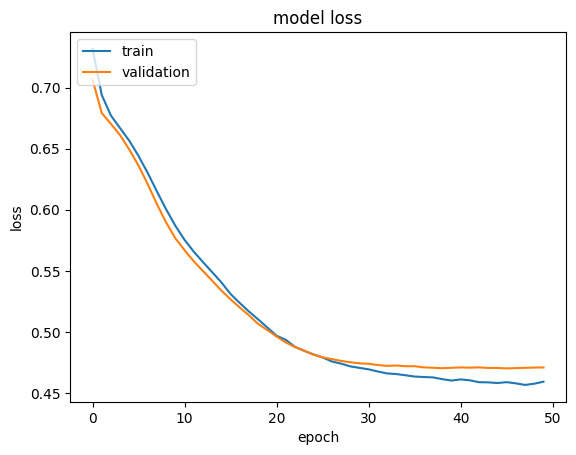

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

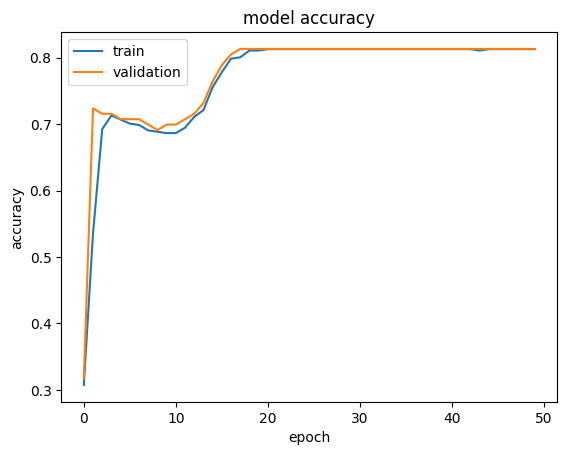

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()